In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import KBinsDiscretizer

In [103]:
import warnings
warnings.filterwarnings("ignore")

In [104]:
pd.set_option('display.max_columns', 30)

In [105]:
df=pd.read_csv("train.csv")

In [106]:
df

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,87,94,172,300,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,83,147,194,55,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,75,79,178,197,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,88,91,180,203,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,76,91,155,87,44,93,15.4,1,0.8,19,13,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,159251,40,155,45,69.0,1.5,2.0,1,1,127,80,64,238,47,72,159,14.5,1,0.8,25,26,13,0,0
159252,159252,50,155,75,82.0,1.0,1.0,1,1,120,80,89,213,202,64,108,14.5,1,0.6,21,20,18,0,0
159253,159253,40,160,50,66.0,1.5,1.0,1,1,114,70,84,189,45,87,93,10.9,1,0.6,15,9,12,0,0
159254,159254,50,165,75,92.0,1.2,1.0,1,1,121,90,122,165,148,55,80,14.4,1,1.1,22,17,37,0,1


In [107]:
df["BMI"]=df["weight(kg)"]/((df["height(cm)"]/100)**2)

In [108]:
df.drop(columns=["id"],inplace=True)

In [109]:
df

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,BMI
0,55,165,60,81.0,0.5,0.6,1,1,135,87,94,172,300,40,75,16.5,1,1.0,22,25,27,0,1,22.038567
1,70,165,65,89.0,0.6,0.7,2,2,146,83,147,194,55,57,126,16.2,1,1.1,27,23,37,1,0,23.875115
2,20,170,75,81.0,0.4,0.5,1,1,118,75,79,178,197,45,93,17.4,1,0.8,27,31,53,0,1,25.951557
3,35,180,95,105.0,1.5,1.2,1,1,131,88,91,180,203,38,102,15.9,1,1.0,20,27,30,1,0,29.320988
4,30,165,60,80.5,1.5,1.0,1,1,121,76,91,155,87,44,93,15.4,1,0.8,19,13,17,0,1,22.038567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,40,155,45,69.0,1.5,2.0,1,1,127,80,64,238,47,72,159,14.5,1,0.8,25,26,13,0,0,18.730489
159252,50,155,75,82.0,1.0,1.0,1,1,120,80,89,213,202,64,108,14.5,1,0.6,21,20,18,0,0,31.217482
159253,40,160,50,66.0,1.5,1.0,1,1,114,70,84,189,45,87,93,10.9,1,0.6,15,9,12,0,0,19.531250
159254,50,165,75,92.0,1.2,1.0,1,1,121,90,122,165,148,55,80,14.4,1,1.1,22,17,37,0,1,27.548209


<Axes: >

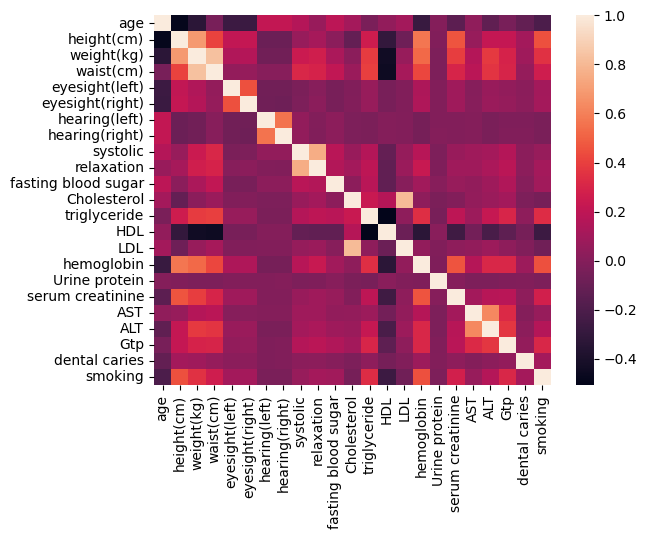

In [181]:
sns.heatmap(df.corr())

In [45]:
df.corr()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,BMI
age,1.000000,-0.489608,-0.336859,-0.045369,-0.269495,-0.277638,0.212889,0.212972,0.160437,0.064924,0.191913,0.106873,-0.038063,0.041411,0.103529,-0.280851,-0.004526,-0.143808,0.036595,-0.131419,-0.046879,-0.120556,-0.206033,-0.077638
height(cm),-0.489608,1.000000,0.686645,0.409500,0.209997,0.216729,-0.090110,-0.091760,0.062297,0.114390,0.017516,-0.113455,0.252464,-0.303450,-0.080001,0.568739,-0.015097,0.459654,0.059126,0.222305,0.218809,0.100585,0.447111,0.167678
weight(kg),-0.336859,0.686645,1.000000,0.830208,0.151794,0.161344,-0.069761,-0.070679,0.241495,0.265921,0.132409,0.020382,0.384313,-0.438224,0.059438,0.527259,-0.028537,0.391769,0.160221,0.376899,0.290996,0.091375,0.351748,0.827517
waist(cm),-0.045369,0.409500,0.830208,1.000000,0.046964,0.055094,0.004759,0.006637,0.306150,0.291389,0.209541,0.075039,0.394593,-0.449219,0.114552,0.418245,-0.029491,0.294176,0.185690,0.359736,0.294166,0.053575,0.262715,0.818023
eyesight(left),-0.269495,0.209997,0.151794,0.046964,1.000000,0.448945,-0.067788,-0.070379,-0.030718,0.010324,-0.048066,-0.014211,0.057775,-0.043069,-0.018312,0.134314,-0.011633,0.089165,-0.000032,0.063819,0.041759,0.020019,0.100420,0.045670
eyesight(right),-0.277638,0.216729,0.161344,0.055094,0.448945,1.000000,-0.072888,-0.078285,-0.026931,0.017073,-0.047424,-0.011569,0.063572,-0.047384,-0.016913,0.140602,-0.011213,0.087232,0.007967,0.073843,0.052901,0.024314,0.109781,0.053130
hearing(left),0.212889,-0.090110,-0.069761,0.004759,-0.067788,-0.072888,1.000000,0.553312,0.041887,-0.011739,0.025334,-0.029430,-0.035088,-0.004135,-0.011467,-0.051724,-0.007248,-0.009447,-0.003497,-0.036896,-0.021820,-0.019155,-0.038219,-0.024290
hearing(right),0.212972,-0.091760,-0.070679,0.006637,-0.070379,-0.078285,0.553312,1.000000,0.041790,-0.015248,0.024982,-0.029276,-0.034343,-0.003311,-0.012463,-0.049649,-0.004164,-0.009263,-0.001232,-0.036679,-0.017286,-0.016100,-0.036858,-0.024394
systolic,0.160437,0.062297,0.241495,0.306150,-0.030718,-0.026931,0.041887,0.041790,1.000000,0.753003,0.176127,0.069044,0.161187,-0.116457,0.052032,0.174904,-0.029040,0.066902,0.092272,0.109954,0.159811,0.018136,0.058642,0.285277
relaxation,0.064924,0.114390,0.265921,0.291389,0.010324,0.017073,-0.011739,-0.015248,0.753003,1.000000,0.152416,0.100405,0.196251,-0.127218,0.073838,0.230445,-0.020445,0.091648,0.090398,0.130043,0.186684,0.023915,0.109501,0.276934


In [ ]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.hist(df["Urine protein"],color="g")
plt.show()

In [110]:
df.drop(columns=["hearing(left)","hearing(right)","Urine protein"],inplace=True)

In [12]:
df_corr=df.corr()

In [13]:
for i in df.columns:
  print(i," is strong correlayed to\n",df_corr[i][df_corr[i]>0.90])

age  is strong correlayed to
 age    1.0
Name: age, dtype: float64
height(cm)  is strong correlayed to
 height(cm)    1.0
Name: height(cm), dtype: float64
weight(kg)  is strong correlayed to
 weight(kg)    1.0
Name: weight(kg), dtype: float64
waist(cm)  is strong correlayed to
 waist(cm)    1.0
Name: waist(cm), dtype: float64
eyesight(left)  is strong correlayed to
 eyesight(left)    1.0
Name: eyesight(left), dtype: float64
eyesight(right)  is strong correlayed to
 eyesight(right)    1.0
Name: eyesight(right), dtype: float64
systolic  is strong correlayed to
 systolic    1.0
Name: systolic, dtype: float64
relaxation  is strong correlayed to
 relaxation    1.0
Name: relaxation, dtype: float64
fasting blood sugar  is strong correlayed to
 fasting blood sugar    1.0
Name: fasting blood sugar, dtype: float64
Cholesterol  is strong correlayed to
 Cholesterol    1.0
Name: Cholesterol, dtype: float64
triglyceride  is strong correlayed to
 triglyceride    1.0
Name: triglyceride, dtype: float64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  159256 non-null  int64  
 1   height(cm)           159256 non-null  int64  
 2   weight(kg)           159256 non-null  int64  
 3   waist(cm)            159256 non-null  float64
 4   eyesight(left)       159256 non-null  float64
 5   eyesight(right)      159256 non-null  float64
 6   systolic             159256 non-null  int64  
 7   relaxation           159256 non-null  int64  
 8   fasting blood sugar  159256 non-null  int64  
 9   Cholesterol          159256 non-null  int64  
 10  triglyceride         159256 non-null  int64  
 11  HDL                  159256 non-null  int64  
 12  LDL                  159256 non-null  int64  
 13  hemoglobin           159256 non-null  float64
 14  serum creatinine     159256 non-null  float64
 15  AST              

In [187]:
df.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,122.503648,76.874071,98.352552,195.796165,127.616046,55.852684,114.607682,14.796965,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365
std,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,12.729315,8.994642,15.329740,28.396959,66.188989,13.964141,28.158931,1.431213,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063
min,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,77.000000,44.000000,46.000000,77.000000,8.000000,9.000000,1.000000,4.900000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,114.000000,70.000000,90.000000,175.000000,77.000000,45.000000,95.000000,13.800000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,121.000000,78.000000,96.000000,196.000000,115.000000,54.000000,114.000000,15.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,130.000000,82.000000,103.000000,217.000000,165.000000,64.000000,133.000000,15.800000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,213.000000,133.000000,375.000000,393.000000,766.000000,136.000000,1860.000000,21.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


In [188]:
df.isna().sum()

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

In [189]:
df.duplicated().sum()

0

In [190]:
df.nunique()

age                     18
height(cm)              14
weight(kg)              28
waist(cm)              531
eyesight(left)          20
eyesight(right)         17
systolic               112
relaxation              75
fasting blood sugar    229
Cholesterol            227
triglyceride           392
HDL                    108
LDL                    222
hemoglobin             134
serum creatinine        28
AST                    140
ALT                    188
Gtp                    362
dental caries            2
smoking                  2
dtype: int64

In [48]:
for col in df.columns:
    print(col," has unique -",df[col].unique())

age  has unique - [55 70 20 35 30 50 45 40 60 25 65 75 80 85 62 69 49 58]
height(cm)  has unique - [165 170 180 160 155 175 150 181 145 185 140 190 135 139]
weight(kg)  has unique - [ 60  65  75  95  55  70  50  45  90  80  85 110  40 100 130 105  30 120
 115 125  35 101  89  82  83  99  79  88]
waist(cm)  has unique - [ 81.   89.  105.   80.5  51.   69.   84.5  73.   68.   64.   80.  103.
  81.8  78.   92.   71.5  90.   93.   85.   86.4  84.   66.   75.   87.5
  91.5  76.   87.   71.   86.   83.   87.2  94.   91.   70.   88.   72.
  93.1  70.4  79.   77.   82.   87.8  97.   85.5  67.   87.3 114.   95.2
  67.2  99.   65.   90.5  74.   73.5  95.   75.8  77.2  98.   91.1  62.
  90.2 101.   89.6  83.4  68.5  72.5  85.7  87.1  59.   89.5 108.5  90.1
  91.8  86.2  72.8  73.2  89.8  86.3 100.   81.5  97.5  76.2  94.5  79.4
  98.5  78.4  90.8  88.4  98.4  94.2  79.7  83.5  93.6  89.9  93.2  89.2
  71.2  92.8  88.2  65.6 101.8  97.8  72.4  75.6  69.8  84.2  60.   92.3
  83.8  75.4  77.6  95.5 

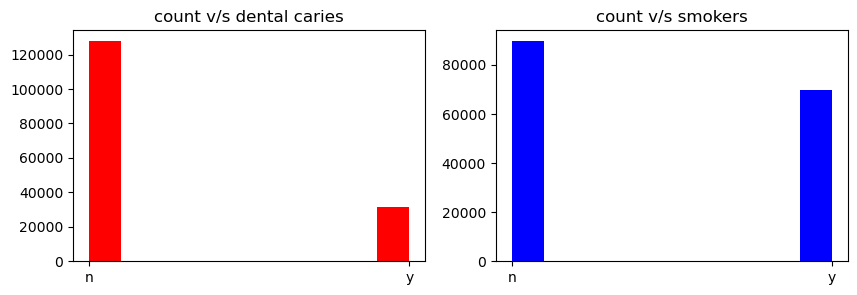

In [191]:

plt.figure(figsize=(10,3))
plt.subplot(121)
plt.hist(df["dental caries"],color="r")
plt.xticks([0,1],["n","y"])
plt.title("count v/s dental caries")
plt.subplot(122)
plt.hist(df["smoking"],color="b")
plt.xticks([0,1],["n","y"])
plt.title("count v/s smokers")
plt.show()

In [111]:
xtrain,xtest,ytrain,ytest=train_test_split(df.drop(columns=["smoking"]),df["smoking"],random_state=42,test_size=0.2)

In [112]:
xtrain

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,dental caries,BMI
60700,40,150,50,80.0,0.5,0.5,120,78,102,179,48,60,109,11.8,0.6,14,11,9,0,22.222222
44065,65,150,50,69.0,0.7,1.0,139,89,243,210,98,67,122,16.3,0.6,17,24,25,0,22.222222
39538,55,155,55,80.0,1.2,1.2,109,71,89,154,45,48,96,13.4,0.6,19,15,16,0,22.892820
105427,55,160,60,83.0,0.7,0.8,130,80,89,230,83,54,159,14.6,0.7,14,13,26,0,23.437500
148669,30,180,90,95.0,1.0,1.2,120,82,87,163,117,54,86,13.8,0.9,25,30,21,0,27.777778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,30,180,80,88.0,1.2,1.2,110,80,97,225,204,42,143,15.3,1.0,41,87,65,0,24.691358
103694,40,165,65,79.0,1.5,1.2,143,95,96,169,156,48,90,15.9,0.9,24,26,53,1,23.875115
131932,45,160,60,81.0,1.0,1.0,100,62,88,166,93,74,74,13.8,0.6,21,13,14,0,23.437500
146867,60,170,85,97.0,1.2,1.5,135,81,87,175,86,42,116,15.0,1.0,33,53,40,0,29.411765


In [113]:
xtest

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,dental caries,BMI
145654,35,175,80,84.0,0.8,1.0,122,70,100,188,238,44,96,16.0,0.7,31,22,32,0,26.122449
49118,35,185,80,88.0,1.2,1.2,100,64,92,154,122,49,80,15.0,0.9,22,22,17,0,23.374726
21769,20,160,60,76.0,1.2,1.2,130,85,90,194,134,34,134,16.9,0.8,24,32,41,1,23.437500
108299,60,155,60,87.8,0.7,0.2,119,62,91,261,103,73,167,13.2,0.9,21,16,14,0,24.973985
117130,60,165,70,85.0,0.8,0.6,142,93,108,179,109,49,108,15.5,0.7,27,40,61,0,25.711662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11934,25,165,60,76.4,1.5,0.5,110,70,87,152,76,50,86,14.6,0.7,22,32,17,0,22.038567
115975,40,155,65,83.0,1.0,1.0,140,100,101,201,96,86,95,14.3,0.6,22,26,21,0,27.055151
158289,40,175,70,84.0,1.2,1.2,117,65,113,168,192,38,92,16.3,1.1,23,26,63,0,22.857143
142308,40,170,50,60.0,1.0,1.0,100,60,86,166,127,59,82,13.9,0.7,21,11,26,0,17.301038


In [114]:
trf1=ColumnTransformer(
    [
        ("powertransformation",PowerTransformer(),slice(0,23)),
        ("binonweight",KBinsDiscretizer(n_bins=5,strategy='quantile',encode='ordinal'),["waist(cm)","systolic",
                                                                                        "HDL","LDL","triglyceride",
                                                                                       "Gtp","AST","ALT"]),
    ]
    ,remainder="passthrough"
)

In [115]:
pipe=Pipeline([
    ("1",trf1),
    ("2",LogisticRegression())
]
)

In [116]:
pipe.fit(xtrain,ytrain)

Pipeline(steps=[('1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('powertransformation',
                                                  PowerTransformer(),
                                                  slice(0, 23, None)),
                                                 ('binonweight',
                                                  KBinsDiscretizer(encode='ordinal'),
                                                  ['waist(cm)', 'systolic',
                                                   'HDL', 'LDL', 'triglyceride',
                                                   'Gtp', 'AST', 'ALT'])])),
                ('2', LogisticRegression())])

In [117]:
pred=pipe.predict(xtest)

In [118]:
accuracy_score(ytest,pred)

0.7575662438779355

In [119]:
roc_auc_score(ytest,pred)

0.7574088930766736

In [87]:
params={
    "2__penalty":['l1','l2'],
     "2__C":[0.5,1,5],
    "2__solver":['liblinear', 'saga']
}

In [88]:
gcv=GridSearchCV(pipe,params,cv=5,scoring="roc_auc")

In [89]:
gcv

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('powertransformation',
                                                                         PowerTransformer(),
                                                                         slice(0, 23, None)),
                                                                        ('binonweight',
                                                                         KBinsDiscretizer(encode='ordinal'),
                                                                         ['waist(cm)',
                                                                          'systolic',
                                                                          'HDL',
                                                                          'LDL',
                                                                          'triglyceride',
                                                                          'Gtp',
                                                                          'AST',
                                                                          'ALT'])])),
                                       ('2', LogisticRegression())]),
             param_grid={'2__C': [0.5, 1, 5], '2__penalty': ['l1', 'l2'],
                         '2__solver': ['liblinear', 'saga']},
             scoring='roc_auc')

In [90]:
gcv.fit(xtrain,ytrain)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('powertransformation',
                                                                         PowerTransformer(),
                                                                         slice(0, 23, None)),
                                                                        ('binonweight',
                                                                         KBinsDiscretizer(encode='ordinal'),
                                                                         ['waist(cm)',
                                                                          'systolic',
                                                                          'HDL',
                                                                          'LDL',
                                                                          'triglyceride',
                                                                          'Gtp',
                                                                          'AST',
                                                                          'ALT'])])),
                                       ('2', LogisticRegression())]),
             param_grid={'2__C': [0.5, 1, 5], '2__penalty': ['l1', 'l2'],
                         '2__solver': ['liblinear', 'saga']},
             scoring='roc_auc')

In [91]:
gcv.best_score_

0.8445991964907135

In [92]:
gcv.best_estimator_

Pipeline(steps=[('1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('powertransformation',
                                                  PowerTransformer(),
                                                  slice(0, 23, None)),
                                                 ('binonweight',
                                                  KBinsDiscretizer(encode='ordinal'),
                                                  ['waist(cm)', 'systolic',
                                                   'HDL', 'LDL', 'triglyceride',
                                                   'Gtp', 'AST', 'ALT'])])),
                ('2', LogisticRegression(C=5, solver='saga'))])

In [93]:
pd.DataFrame(gcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_2__C,param_2__penalty,param_2__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,44.526706,7.001414,0.087787,0.007303,0.5,l1,liblinear,"{'2__C': 0.5, '2__penalty': 'l1', '2__solver':...",0.845871,0.841349,0.842962,0.845706,0.847081,0.844594,0.002109,8
1,17.081213,1.150669,0.102478,0.016095,0.5,l1,saga,"{'2__C': 0.5, '2__penalty': 'l1', '2__solver':...",0.845890,0.841368,0.842957,0.845689,0.847080,0.844597,0.002104,6
2,9.349359,0.726277,0.090197,0.008521,0.5,l2,liblinear,"{'2__C': 0.5, '2__penalty': 'l2', '2__solver':...",0.845801,0.841266,0.842966,0.845711,0.846998,0.844549,0.002107,11
3,14.976751,1.018414,0.099148,0.006920,0.5,l2,saga,"{'2__C': 0.5, '2__penalty': 'l2', '2__solver':...",0.845801,0.841262,0.842967,0.845709,0.846998,0.844548,0.002108,12
4,51.179898,6.922393,0.108010,0.015384,1,l1,liblinear,"{'2__C': 1, '2__penalty': 'l1', '2__solver': '...",0.845883,0.841357,0.842962,0.845702,0.847077,0.844596,0.002107,7
5,15.369951,0.474466,0.084367,0.007658,1,l1,saga,"{'2__C': 1, '2__penalty': 'l1', '2__solver': '...",0.845899,0.841373,0.842951,0.845681,0.847088,0.844598,0.002106,4
6,9.240021,0.407496,0.090614,0.011700,1,l2,liblinear,"{'2__C': 1, '2__penalty': 'l2', '2__solver': '...",0.845862,0.841329,0.842970,0.845710,0.847058,0.844586,0.002108,9
7,13.683477,0.498743,0.087485,0.007647,1,l2,saga,"{'2__C': 1, '2__penalty': 'l2', '2__solver': '...",0.845863,0.841328,0.842971,0.845710,0.847057,0.844586,0.002108,10
8,52.997504,9.598657,0.088063,0.006852,5,l1,liblinear,"{'2__C': 5, '2__penalty': 'l1', '2__solver': '...",0.845891,0.841374,0.842961,0.845679,0.847084,0.844598,0.002102,5
9,17.571234,1.057194,0.098223,0.010709,5,l1,saga,"{'2__C': 5, '2__penalty': 'l1', '2__solver': '...",0.845906,0.841377,0.842945,0.845673,0.847092,0.844599,0.002107,3


In [121]:
gcv.best_params_

{'2__C': 5, '2__penalty': 'l2', '2__solver': 'saga'}

In [120]:
roc_auc_score(ytest,gcv.predict(xtest))

0.7576635165538256

In [122]:
pipe2=Pipeline([
    ("1",trf1),
    ("2",RandomForestClassifier())
]
)

params2={
    "2__n_estimators":[10,50,100],
    "2__criterion" : ["gini", "entropy", "log_loss"],
    "2__max_depth" :[5,10,None]
}

gcv2=GridSearchCV(pipe2,params2,cv=5)

gcv2.fit(xtrain,ytrain)
gcv2.best_score_

0.7743791350799935

In [123]:
gcv2.best_estimator_

Pipeline(steps=[('1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('powertransformation',
                                                  PowerTransformer(),
                                                  slice(0, 23, None)),
                                                 ('binonweight',
                                                  KBinsDiscretizer(encode='ordinal'),
                                                  ['waist(cm)', 'systolic',
                                                   'HDL', 'LDL', 'triglyceride',
                                                   'Gtp', 'AST', 'ALT'])])),
                ('2', RandomForestClassifier(criterion='entropy'))])

In [124]:
gcv2.best_params_

{'2__criterion': 'entropy', '2__max_depth': None, '2__n_estimators': 100}

In [129]:
pd.DataFrame(gcv2.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_2__criterion,param_2__max_depth,param_2__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.095969,0.654522,0.126404,0.012009,gini,5,10,"{'2__criterion': 'gini', '2__max_depth': 5, '2...",0.749029,0.756407,0.755033,0.756564,0.752865,0.753979,0.002808,24
1,11.389777,0.899187,0.287244,0.015238,gini,5,50,"{'2__criterion': 'gini', '2__max_depth': 5, '2...",0.753463,0.753071,0.760135,0.757152,0.756476,0.756059,0.002594,19
2,16.183052,0.543410,0.449352,0.012457,gini,5,100,"{'2__criterion': 'gini', '2__max_depth': 5, '2...",0.754680,0.753738,0.761469,0.756838,0.758006,0.756946,0.002721,16
3,8.222224,0.588082,0.167702,0.029461,gini,10,10,"{'2__criterion': 'gini', '2__max_depth': 10, '...",0.767160,0.767199,0.770653,0.771908,0.769388,0.769262,0.001878,13
4,17.281690,0.448003,0.392643,0.035197,gini,10,50,"{'2__criterion': 'gini', '2__max_depth': 10, '...",0.768219,0.768259,0.772850,0.773910,0.771350,0.770918,0.002334,6
5,30.252708,1.641524,0.701013,0.061475,gini,10,100,"{'2__criterion': 'gini', '2__max_depth': 10, '...",0.768690,0.769240,0.774067,0.773204,0.772331,0.771506,0.002153,4
6,12.143102,0.742836,0.212657,0.016906,gini,None,10,"{'2__criterion': 'gini', '2__max_depth': None,...",0.746517,0.739414,0.745850,0.744751,0.747763,0.744859,0.002892,27
7,42.573476,1.301692,0.736592,0.060929,gini,None,50,"{'2__criterion': 'gini', '2__max_depth': None,...",0.771555,0.768337,0.770888,0.771634,0.771429,0.770769,0.001243,8
8,86.489799,6.013580,1.576294,0.262815,gini,None,100,"{'2__criterion': 'gini', '2__max_depth': None,...",0.771084,0.770103,0.775754,0.775911,0.773273,0.773225,0.002364,3
9,6.366324,0.399993,0.129278,0.002166,entropy,5,10,"{'2__criterion': 'entropy', '2__max_depth': 5,...",0.750912,0.752011,0.754444,0.756681,0.758791,0.754568,0.002906,23


In [126]:
accuracy_score(ytest,gcv2.predict(xtest))

0.7698731633806354

In [127]:
roc_auc_score(ytest,gcv2.predict(xtest))

0.7724090553339896

In [75]:
pipe3=Pipeline([
    ("1",trf1),
    ("2",KNeighborsClassifier())
]
)

params3={
    "2__n_neighbors":[3,5],
    "2__weights":["uniform", "distance"]
}

gcv3=GridSearchCV(pipe3,params3,cv=5,scoring="roc_auc")

gcv3.fit(xtrain,ytrain)
gcv3.best_score_

0.8038882629522159

In [76]:
pd.DataFrame(gcv3.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_2__n_neighbors,param_2__weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.659801,0.392026,15.296112,2.732485,3,uniform,"{'2__n_neighbors': 3, '2__weights': 'uniform'}",0.778893,0.776695,0.778477,0.777369,0.781933,0.778673,0.001807,4
1,4.614791,0.409460,12.862291,0.405730,3,distance,"{'2__n_neighbors': 3, '2__weights': 'distance'}",0.779607,0.777723,0.778682,0.778368,0.782431,0.779362,0.001650,3
2,4.688543,0.396453,15.246102,1.948781,5,uniform,"{'2__n_neighbors': 5, '2__weights': 'uniform'}",0.803249,0.799567,0.801063,0.805151,0.805457,0.802898,0.002290,2
3,4.630416,0.704446,14.688683,2.579977,5,distance,"{'2__n_neighbors': 5, '2__weights': 'distance'}",0.803867,0.801201,0.802136,0.805683,0.806554,0.803888,0.002031,1


In [77]:
gcv3.best_params_

{'2__n_neighbors': 5, '2__weights': 'distance'}

In [78]:
gcv3

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('powertransformation',
                                                                         PowerTransformer(),
                                                                         slice(0, 23, None)),
                                                                        ('binonweight',
                                                                         KBinsDiscretizer(encode='ordinal'),
                                                                         ['waist(cm)',
                                                                          'systolic',
                                                                          'HDL',
                                                                          'LDL',
                                                                          'triglyceride',
                                                                          'Gtp',
                                                                          'AST',
                                                                          'ALT'])])),
                                       ('2', KNeighborsClassifier())]),
             param_grid={'2__n_neighbors': [3, 5],
                         '2__weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [79]:
gcv3.best_estimator_

Pipeline(steps=[('1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('powertransformation',
                                                  PowerTransformer(),
                                                  slice(0, 23, None)),
                                                 ('binonweight',
                                                  KBinsDiscretizer(encode='ordinal'),
                                                  ['waist(cm)', 'systolic',
                                                   'HDL', 'LDL', 'triglyceride',
                                                   'Gtp', 'AST', 'ALT'])])),
                ('2', KNeighborsClassifier(weights='distance'))])

In [80]:
accuracy_score(ytest,gcv3.predict(xtest))

0.716155971367575

In [136]:
roc_auc_score(ytest,gcv3.predict(xtest))

0.7308117493897923

 Final

In [154]:
df

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,dental caries,smoking,BMI
0,55,165,60,81.0,0.5,0.6,135,87,94,172,300,40,75,16.5,1.0,22,25,27,0,1,22.038567
1,70,165,65,89.0,0.6,0.7,146,83,147,194,55,57,126,16.2,1.1,27,23,37,1,0,23.875115
2,20,170,75,81.0,0.4,0.5,118,75,79,178,197,45,93,17.4,0.8,27,31,53,0,1,25.951557
3,35,180,95,105.0,1.5,1.2,131,88,91,180,203,38,102,15.9,1.0,20,27,30,1,0,29.320988
4,30,165,60,80.5,1.5,1.0,121,76,91,155,87,44,93,15.4,0.8,19,13,17,0,1,22.038567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,40,155,45,69.0,1.5,2.0,127,80,64,238,47,72,159,14.5,0.8,25,26,13,0,0,18.730489
159252,50,155,75,82.0,1.0,1.0,120,80,89,213,202,64,108,14.5,0.6,21,20,18,0,0,31.217482
159253,40,160,50,66.0,1.5,1.0,114,70,84,189,45,87,93,10.9,0.6,15,9,12,0,0,19.531250
159254,50,165,75,92.0,1.2,1.0,121,90,122,165,148,55,80,14.4,1.1,22,17,37,0,1,27.548209


In [142]:
pipe2=Pipeline([
    ("1",trf1),
    ("2",RandomForestClassifier(criterion='entropy'))
]
)
pipe2.fit(df.drop(columns=["smoking"]),df["smoking"])

Pipeline(steps=[('1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('powertransformation',
                                                  PowerTransformer(),
                                                  slice(0, 23, None)),
                                                 ('binonweight',
                                                  KBinsDiscretizer(encode='ordinal'),
                                                  ['waist(cm)', 'systolic',
                                                   'HDL', 'LDL', 'triglyceride',
                                                   'Gtp', 'AST', 'ALT'])])),
                ('2', RandomForestClassifier(criterion='entropy'))])

In [145]:
testdata=pd.read_csv("test.csv")

In [146]:
testdata

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,159256,40,165,70,84.0,1.2,1.2,1,1,130,89,107,200,186,49,115,14.2,1,0.9,19,25,32,0
1,159257,80,160,60,93.0,1.0,1.0,2,2,144,72,93,172,158,35,104,13.0,1,1.1,20,12,24,0
2,159258,60,170,70,86.5,0.6,0.7,1,1,117,75,92,161,173,39,88,15.4,1,1.4,38,60,36,0
3,159259,40,160,50,67.0,0.3,0.4,1,1,116,62,91,213,47,75,128,14.5,1,0.6,25,18,10,1
4,159260,40,170,75,89.4,1.0,0.9,1,1,132,94,79,170,100,39,123,16.5,1,1.0,30,39,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106166,265422,40,165,60,78.0,0.8,0.9,1,1,112,78,134,225,82,59,149,16.4,1,1.1,24,31,28,0
106167,265423,40,170,85,95.0,1.2,1.2,1,1,130,90,97,180,186,44,100,16.0,2,1.0,25,31,38,0
106168,265424,35,170,85,89.0,1.2,1.2,1,1,131,86,106,211,76,53,142,15.9,1,0.8,33,32,24,1
106169,265425,40,160,60,67.0,0.7,0.8,1,1,120,80,92,175,81,55,103,13.9,1,0.6,42,36,32,0


In [147]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106171 entries, 0 to 106170
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   106171 non-null  int64  
 1   age                  106171 non-null  int64  
 2   height(cm)           106171 non-null  int64  
 3   weight(kg)           106171 non-null  int64  
 4   waist(cm)            106171 non-null  float64
 5   eyesight(left)       106171 non-null  float64
 6   eyesight(right)      106171 non-null  float64
 7   hearing(left)        106171 non-null  int64  
 8   hearing(right)       106171 non-null  int64  
 9   systolic             106171 non-null  int64  
 10  relaxation           106171 non-null  int64  
 11  fasting blood sugar  106171 non-null  int64  
 12  Cholesterol          106171 non-null  int64  
 13  triglyceride         106171 non-null  int64  
 14  HDL                  106171 non-null  int64  
 15  LDL              

In [148]:
testdata["BMI"]=testdata["weight(kg)"]/((testdata["height(cm)"]/100)**2)

In [149]:
testdata.drop(columns=["hearing(left)","hearing(right)","Urine protein"],inplace=True)

In [150]:
testdata

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,dental caries,BMI
0,159256,40,165,70,84.0,1.2,1.2,130,89,107,200,186,49,115,14.2,0.9,19,25,32,0,25.711662
1,159257,80,160,60,93.0,1.0,1.0,144,72,93,172,158,35,104,13.0,1.1,20,12,24,0,23.437500
2,159258,60,170,70,86.5,0.6,0.7,117,75,92,161,173,39,88,15.4,1.4,38,60,36,0,24.221453
3,159259,40,160,50,67.0,0.3,0.4,116,62,91,213,47,75,128,14.5,0.6,25,18,10,1,19.531250
4,159260,40,170,75,89.4,1.0,0.9,132,94,79,170,100,39,123,16.5,1.0,30,39,27,1,25.951557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106166,265422,40,165,60,78.0,0.8,0.9,112,78,134,225,82,59,149,16.4,1.1,24,31,28,0,22.038567
106167,265423,40,170,85,95.0,1.2,1.2,130,90,97,180,186,44,100,16.0,1.0,25,31,38,0,29.411765
106168,265424,35,170,85,89.0,1.2,1.2,131,86,106,211,76,53,142,15.9,0.8,33,32,24,1,29.411765
106169,265425,40,160,60,67.0,0.7,0.8,120,80,92,175,81,55,103,13.9,0.6,42,36,32,0,23.437500


In [155]:
file=pd.DataFrame(
      {
          "id":testdata["id"].values,
           "defects":pipe2.predict_proba(testdata.drop(columns=["id"]))[:,1]
       }
      )
file.to_csv("rfc.csv",index=False)